<a href="https://colab.research.google.com/github/yomnabarakate21/Computer-vision-Course-assignments/blob/master/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random;
from pylab import *
from numpy import *;
import cv2 
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2. Get the image
#test_downloaded=drive.CreateFile({'id':'1IBcMf1eqiNwjIPUdqFnRQ11wq7lqBslU'})
test_downloaded=drive.CreateFile({'id':'10iU8qM0mFxOUMYbc3uzJ-0By4iLDbDSg'})

test_downloaded.GetContentFile('coin.PNG')

# Convert RGB to grey scaled image

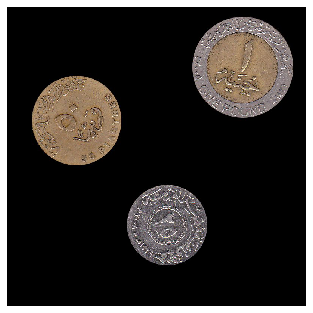

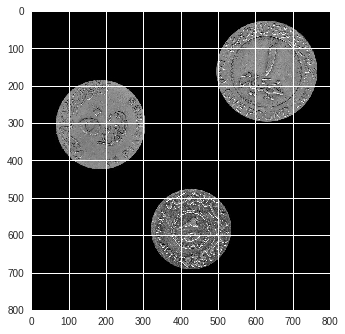

In [348]:
img = array(Image.open('coin.PNG'))
plt.figure()
plt.imshow(img),plt.xticks([]), plt.yticks([])
plt.show()
gray_img = array(Image.open('coin.PNG').convert('L'))   
plt.imshow(gray_img, cmap="gray")
plt.show()


# Smoothing the image
Smoothing the image is accomplished using a 2-dimensional median smoothing lter. 

A windowsize of seven will be suitable for the provided data set.

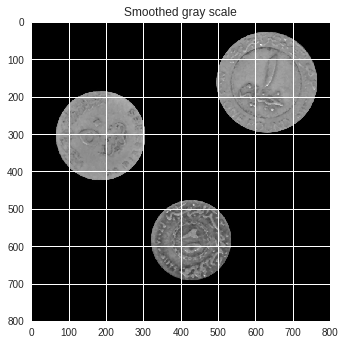

In [307]:
smoothed_img = cv2.medianBlur(gray_img,5)
plt.imshow(smoothed_img,cmap="gray"),plt.title('Smoothed gray scale'),plt.xticks(), plt.yticks() 
plt.show()

# 3.2 Edge Detection
After smoothing the image, Canny's algorithm has to be used for edge detection. We will use
relatively high values for thresholding to remove most of the noise. Suitable threshold values
for the provided data set are 250 for the low threshold and 280 for the high threshold.

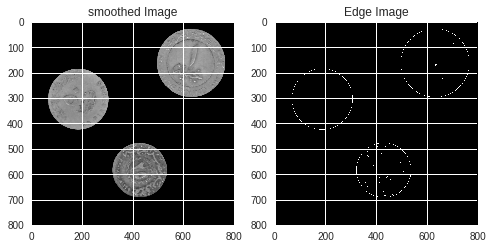

In [308]:
edges = cv2.Canny(smoothed_img,250,280)
plt.subplot(121),plt.imshow(smoothed_img,cmap = 'gray')
plt.title('smoothed Image')
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image')
plt.show()

# 3.3 Accumulation into (a,b)-space using circular Hough transform

In [0]:
def HoughTransform(edges, raduis):
  
  r = raduis
  rows = edges.shape[0]
  cols = edges.shape[1]
  
  #initialize your accumalator for counting votes.
  Acc = np.zeros((rows,cols))
  
  #for every pixel in the edges image
  for i in range(rows):
    for j in range(cols):
      #check if the pixel is a real edge
      if edges[i][j] == 255:
        #get all possible values that the center of a circle r can take with respect to this pixel.
        for theta in range(0,361):
          a = round(i + r * math.sin(math.radians(theta)))
          b = round(j + r * math.cos(math.radians(theta)))
          #make sure that the center calculated doesn't exceed the size of the image.
          if a>=0 and a < rows and b>=0 and b<cols :
            #increase the vote for this center by one.
            Acc[a][b]+=1
            
  return Acc

In [330]:
i=5.5
print(int(i))

5


# Call the Hough transform for Pound, 30 Piasters and 25 piasters


Text(0.5,1,'real image')

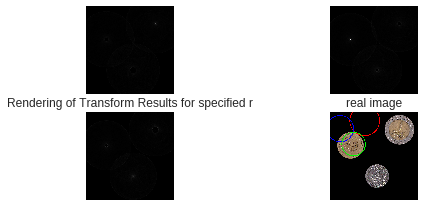

In [340]:
#declare your constants
piasters_50_raduis = 120
pound_raduis = 135
piasters_25_raduis= 107

#call Hough transfrom function
pounds_Acc = HoughTransform(edges, pound_raduis)
piasters_50_Acc = HoughTransform(edges,piasters_50_raduis)
piasters_25_Acc = HoughTransform(edges, piasters_25_raduis)
  
plt.subplot(321),plt.imshow(pounds_Acc,cmap = 'gray'),plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(piasters_50_Acc,cmap = 'gray'),plt.xticks([]), plt.yticks([])
plt.subplot(323),plt.imshow(piasters_25_Acc,cmap = 'gray'),plt.xticks([]), plt.yticks([])

plt.title('Rendering of Transform Results for specified r')


plt.subplot(324),plt.imshow(img),plt.xticks([]), plt.yticks([])
plt.title('real image')

In [0]:
#print the votes for the maximum 30 pixels.
###print(sorted(Acc.flatten(), reverse=True)[0:30]) 

def get_centers(Acc):
  #get the maximum no of votes obtained for one pixel.
  maximum_val = sorted(Acc.flatten(), reverse=True)[0]

  #apply a threshold to indicate which centers will be taken.
  Acc[Acc < maximum_val -50] = 0
  #take the centers that had more votes than threshold to be chosen as centers
  centers = np.array(np.transpose (np.nonzero(Acc)))
  centers[:,[0,1]] = centers[:,[1,0]]
  return centers



In [0]:
#get centers for each of type of coins:

c1 = get_centers(pounds_Acc)
c2 = get_centers( piasters_50_Acc)
c3 =  get_centers( piasters_25_Acc)

# **Identifying the coins**

In [0]:
#identify center of coins from redundancies
def identifyCoins (centers):
  
  for i in range (0,centers.shape[0]):
    for j in range (i,centers.shape[0]):
      if(j>= centers.shape[0] or i >= centers.shape[0]):
        break
      else:  
       
        if (0<=abs(centers[i][0] - centers[j][0])<=4 and (0<=abs((centers[i][1] - centers[j][1]))<=4) ):
          
          if((centers[i][0]!=centers[j][0]) or (centers[i][1]!=centers[j][1])):
          
            centers[j][0]=0
            centers[j][1]=0
          
         
  Ncenters = np.array( np.nonzero(centers)) 
  return Ncenters,centers


#get final centers
def getFinalCenters(indices, centers):
  c = []
  for i in range(0,indices.shape[1],2):
    c.append(centers[indices[0][i]])
  return c

# Draw Circles for detected centers:

In [0]:
def drawCircles(centers, color, img, r):
  
  for i in range( centers.shape[0]):
    cv2.circle(img,(centers[i][0],centers[i][1]), r, color= color, thickness=5)
  

Nc1 [[630 160]]
1


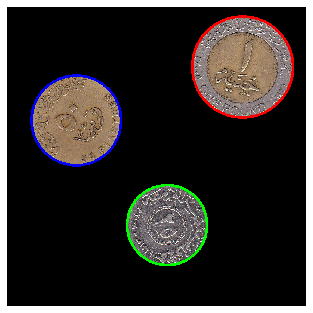

In [349]:
red = (255,0,0)
green = (0,255,0)
blue = (0,0,255)

print("Nc1", Nc1)

#Identify pounds
drawCircles(Nc1, red, img, pound_raduis)
#Identify 30 pisaters
drawCircles(Nc2, blue, img, piasters_50_raduis )
#Identify 25 piasters
drawCircles(Nc3, green, img, piasters_25_raduis  )

plt.imshow(img),plt.xticks([]), plt.yticks([])


In [316]:

print("ss")
for i in range (c3.shape[0]):
  for j in range (c3.shape[0]):
    if(j >= c3.shape[0] or i >= c3.shape[0]):
      break
    else:  
      if (0<=(abs(c3[i][0] - c3[j][0])<=2) and(0<=(c3[i][1] - c3[j][1])<=2) ):
        if((c3[i][0]!=c3[j][0])and (c3[i][1]!=c3[j][1])):
          c3=np.delete(c3, j, 0)
        
print(c3)
print(c3.shape)

ss
[[428 583]]
(1, 2)
